In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [23]:
def read_file (name):
    loss = []
    with open (name,  'r') as file:
        for elem in file.readlines ():
            loss.append (float (elem.replace ("\n", "")))
    
    return loss

In [24]:
list_txt = os.listdir ()
result = {}

for name in list_txt:
    if name != 'compare_optimizer.ipynb':
        result[name.replace (".txt", "").replace ("_", " ").replace ("optim", "оптимизатор")] = read_file(name)

In [25]:
data = pd.DataFrame (result)
data["epoch"] = np.linspace (0, len (data['AMSgrad оптимизатор']), len (data['AMSgrad оптимизатор']))

In [26]:
data.keys()

Index(['Adadelta оптимизатор', 'Adagrad оптимизатор', 'Adamax оптимизатор',
       'Adam l2 оптимизатор', 'AMSgrad оптимизатор', 'Momentum оптимизатор',
       'NAG оптимизатор', 'RMSprops оптимизатор', 'SDG оптимизатор', 'epoch'],
      dtype='object')

In [27]:
data['Adadelta оптимизатор'][0]

0.3500665730144678

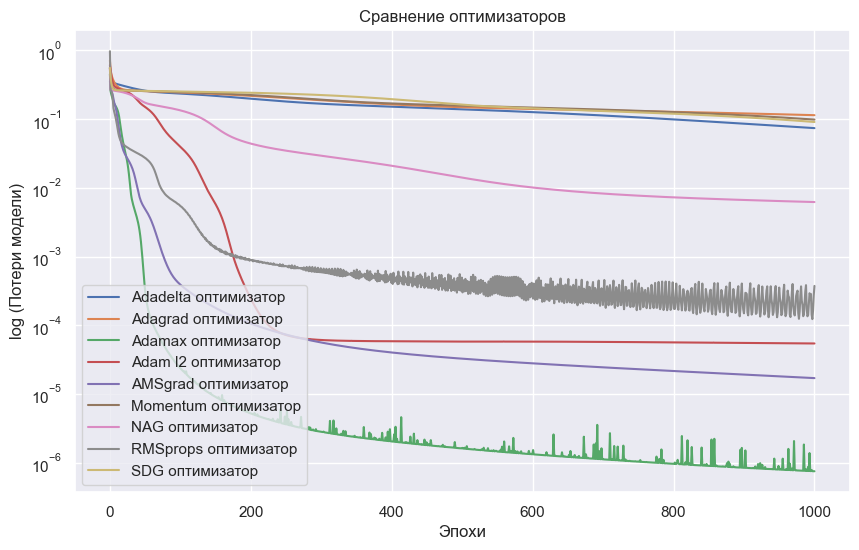

In [45]:
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots (figsize = (10, 6))

for name_optim in data.keys():
    if name_optim != "epoch":
        sns.lineplot (data, x=data["epoch"], y = (data[name_optim]), label = name_optim.replace(".txt", "").replace("_", " "), ax= axs)

plt.legend ()
plt.yscale('log')
plt.title ("Сравнение оптимизаторов")
plt.ylabel ("log (Потери модели)")
plt.xlabel ("Эпохи")
plt.show ()